In [1]:
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('NYcrimelocation.csv')
data1=data[data['Occurrence Year']==2015]
data1['lng']=data1['Location 1'].str.split(',').str.get(1).str.rstrip(')')
data1['lat']=data1['Location 1'].str.split(',').str.get(0).str.lstrip('(')
data1.lng=data1.lng.astype('float')
data1.lat=data1.lat.astype('float')
date=pd.to_datetime(data1['Occurrence Date'])

t_delta=(date-date.min()).astype('timedelta64[D]')
data1['days']=t_delta
data1.head(1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

OBJECTID Identifier         Occurrence Date Day of Week  \
5439    5440.0   aae098f0  10/02/2015 12:11:00 PM      Monday   

     Occurrence Month  Occurrence Day  Occurrence Year  Occurrence Hour  \
5439              Oct             2.0           2015.0             12.0   

      CompStat Month  CompStat Day  ...    Sector Precinct    Borough  \
5439            11.0          23.0  ...         B     25.0  MANHATTAN   

          Jurisdiction  XCoordinate YCoordinate  \
5439  N.Y. POLICE DEPT    1001575.0    232339.0   

                                 Location 1        lng        lat   days  
5439  (40.8043840460001, -73.9374216689999) -73.937422  40.804384  274.0  

[1 rows x 23 columns]

In [283]:
print(date.min(),date.max())

2015-01-01 00:00:00 2015-12-31 23:36:00


In [3]:
import folium
from folium.plugins import MarkerCluster

In [285]:
map = folium.Map(location=[40.7128, -74.0059],zoom_start=12)

In [286]:
map

In [20]:
data1.head(2)

OBJECTID Identifier         Occurrence Date Day of Week  \
5439     5440.0   aae098f0  10/02/2015 12:11:00 PM      Monday   
17511   17512.0   d71bac4b  09/06/2015 02:00:00 AM   Wednesday   

      Occurrence Month  Occurrence Day  Occurrence Year  Occurrence Hour  \
5439               Oct             2.0           2015.0             12.0   
17511              Sep             6.0           2015.0              2.0   

       CompStat Month  CompStat Day  ...    Sector Precinct    Borough  \
5439             11.0          23.0  ...         B     25.0  MANHATTAN   
17511            10.0           2.0  ...         G     90.0   BROOKLYN   

              Jurisdiction  XCoordinate YCoordinate  \
5439      N.Y. POLICE DEPT    1001575.0    232339.0   
17511  N.Y. HOUSING POLICE     999983.0    195658.0   

                                  Location 1        lng        lat   days  
5439   (40.8043840460001, -73.9374216689999) -73.937422  40.804384  274.0  
17511          (40.703707008, -73.943257966) -73.943258  40.703707  248.0  

[2 rows x 23 columns]

In [291]:
data1.columns

Index(['OBJECTID', 'Identifier', 'Occurrence Date', 'Day of Week',
       'Occurrence Month', 'Occurrence Day', 'Occurrence Year',
       'Occurrence Hour', 'CompStat Month', 'CompStat Day', 'CompStat Year',
       'Offense', 'Offense Classification', 'Sector', 'Precinct', 'Borough',
       'Jurisdiction', 'XCoordinate', 'YCoordinate', 'Location 1', 'lng',
       'lat', 'days'],
      dtype='object')

In [292]:
data1.dtypes

OBJECTID                  float64
Identifier                 object
Occurrence Date            object
Day of Week                object
Occurrence Month           object
Occurrence Day            float64
Occurrence Year           float64
Occurrence Hour           float64
CompStat Month            float64
CompStat Day              float64
CompStat Year             float64
Offense                    object
Offense Classification     object
Sector                     object
Precinct                  float64
Borough                    object
Jurisdiction               object
XCoordinate               float64
YCoordinate               float64
Location 1                 object
lng                       float64
lat                       float64
days                      float64
dtype: object

In [12]:
locationfreq=pd.DataFrame(data1.groupby(['lat','lng']).size().sort_values().tail(5))

In [13]:
locationfreq.to_csv('locationfreq.csv')

In [14]:
locationfreq=pd.read_csv('locationfreq.csv')

In [18]:
locationfreq

lat        lng    0
0  40.576646 -73.976480  104
1  40.761875 -73.966358  104
2  40.679981 -73.776234  155
3  40.750431 -73.989282  292
4  40.791152 -73.884372  345

In [19]:
import geocoder

In [27]:
address=[]
for index,row in locationfreq.iterrows():
    coordinates1=[row['lat'],row['lng']]
    adname=str(geocoder.google(coordinates1,method='reverse'))
    address.append(adname)

In [44]:
address

['<[OK] Google - Reverse [2951 W 8th St, Brooklyn, NY 11224, USA]>',
 '<[OK] Google - Reverse [1000 3rd Ave, New York, NY 10065, USA]>',
 '<[OK] Google - Reverse [167-1-167-99 Baisley Blvd, Jamaica, NY 11434, USA]>',
 '<[OK] Google - Reverse [154 W 34th St, New York, NY 10001, USA]>',
 '<[OK] Google - Reverse [15-0 Hazen St, East Elmhurst, NY 11370, USA]>']

In [45]:
newaddress=['2951 W 8th St, Brooklyn, NY 11224',
           '1000 3rd Ave, New York, NY 1006',
           '167-99 Baisley Blvd, Jamaica, NY 11434',
           '154 W 34th St, New York, NY 10001',
           '15-0 Hazen St, East Elmhurst, NY 11370']

plot location using latitude and longitude

In [15]:
import folium
NY_COORDINATES=[40.7128, -74.0059]
map_brew = folium.Map(location=NY_COORDINATES, zoom_start=12)

In [57]:
for index, row in locationfreq.iterrows():
    for i in range(5):
        coordinates =[row['lat'],row['lng']]
        map_brew.simple_marker(location=coordinates)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [58]:
map_brew.save('locationfreqmap1.html')

In [96]:
data[:1]

OBJECTID Identifier         Occurrence Date Day of Week Occurrence Month  \
0       1.0   f070032d  09/06/1940 07:30:00 PM      Friday              Sep   

   Occurrence Day  Occurrence Year  Occurrence Hour  CompStat Month  \
0             6.0           1940.0             19.0             9.0   

   CompStat Day  CompStat Year   Offense Offense Classification Sector  \
0           7.0         2010.0  BURGLARY                 FELONY      D   

   Precinct   Borough      Jurisdiction  XCoordinate  YCoordinate  \
0      66.0  BROOKLYN  N.Y. POLICE DEPT     987478.0     166141.0   

                              Location 1  
0  (40.6227027620001, -73.9883732929999)

crime type wordcloud

In [79]:
data1.groupby('Offense').size().sort_values()

Offense
MURDER & NON-NEGL. MANSLAUGHTE      336
RAPE                               1156
GRAND LARCENY OF MOTOR VEHICLE     7250
BURGLARY                          14967
ROBBERY                           16886
FELONY ASSAULT                    20189
GRAND LARCENY                     41873
dtype: int64

In [466]:
word_cloud=data1['Offense']

In [468]:
word_cloud.to_csv('wordcloud.csv')

In [64]:
wordtext=open('wordcloud.txt').read()

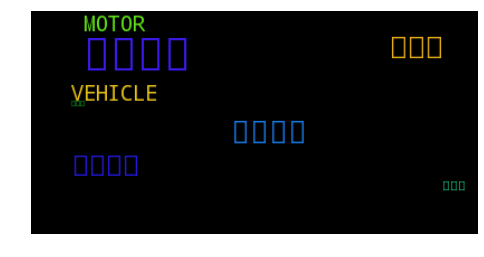

In [69]:
# take relative word frequencies into account, lower max_font_size
# -*- coding:utf-8 -*-
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(wordtext)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


day of crime vis

In [138]:
month_day_g=data1.groupby(['Occurrence Month','Day of Week']).size().reset_index()

In [112]:
time_day_g=data1.groupby(['Occurrence Hour','Day of Week']).size().reset_index()

In [92]:
month_day_g=month_day_g.rename(columns={0:'freq'})

In [113]:
time_day_g=time_day_g.rename(columns={0:'freq'})

In [93]:
month_day_g.freq.max()

1690

In [51]:
time_day_g.freq.max()

987

In [114]:
from bokeh.plotting import *
from bokeh.models import HoverTool

In [115]:
monthdata =month_day_g.pivot(index='Occurrence Month', columns='Day of Week', values='freq')

NameError: name 'month_day_g' is not defined

In [128]:
timedata=time_day_g.pivot(index='Occurrence Hour',columns='Day of Week',values='freq')

In [129]:
timedata.index=map(int,timedata.index)

In [130]:
timedata.index=map(str,timedata.index)

In [108]:
timedata.head(),timedata.columns,timedata.dtypes

(Day of Week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
 0.0             713     700       808     791       668      632        653
 1.0             512     454       668     801       450      411        440
 2.0             400     393       725     789       356      351        373
 3.0             392     317       661     742       354      293        308
 4.0             357     346       672     694       338      266        265,
 Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'],
       dtype='object', name='Day of Week'),
 Day of Week
 Friday       int64
 Monday       int64
 Saturday     int64
 Sunday       int64
 Thursday     int64
 Tuesday      int64
 Wednesday    int64
 dtype: object)

In [141]:
print(timedata.max().max(),timedata.min().min())
print(month_day_g.max(),month_day_g.min())

987 211
Occurrence Month          Sep
Day of Week         Wednesday
0                        1690
dtype: object Occurrence Month       Apr
Day of Week         Friday
0                      827
dtype: object


In [110]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
times=[i for i in range(24)]
times=list(map(str, times))

In [111]:
# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
max_count = month_day_g["freq"].max().astype(int)
day_of_week = []
month = []
color = []
frequencies = []
for m in months:
    for idx, day in enumerate(days):
        day_of_week.append(day)
        month.append(m)
        count = monthdata.loc[m][idx]
        frequencies.append(count)
        color.append("#%02x%02x%02x" % (0, 255 - int((count / max_count) * 255.0), 255 - 
                                        int((count / max_count) * 255.0)))
 
source = ColumnDataSource(
    data=dict(
        day_of_week=day_of_week,
        month=month,
        color=color,
        frequencies=frequencies,
    )
)

NameError: name 'month_day_g' is not defined

In [131]:
timedata.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')

In [132]:
# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
max_count = time_day_g["freq"].max().astype(int)
day_of_week = []
time= []
color = []
frequencies = []
for t in times:
    for idx, day in enumerate(days):
        day_of_week.append(day)
        time.append(t)
        count = timedata.loc[t][idx]
        frequencies.append(count)
        color.append("#%02x%02x%02x" % (0, 255 - int((count / max_count) * 255.0), 255 - 
                                        int((count / max_count) * 255.0)))
 
source = ColumnDataSource(
    data=dict(
        day_of_week=day_of_week,
        time=time,
        color=color,
        frequencies=frequencies,
    )
)

In [98]:
from collections import OrderedDict
output_file('all-las-parties.html')
 
TOOLS = "hover"

p=figure(
    title='\"Analysis\" of Crime Incidence in NY', 
    x_range=months, 
    y_range=list(reversed(days)),
    tools=TOOLS)
p.plot_width=900
p.plot_height = 400
p.toolbar_location='left'

p.rect("month", "day_of_week", 1, 1, source=source, color=color, line_color=None)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "20pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('frequencies', '@frequencies'),
])

show(p) 

INFO:bokeh.core.state:Session output file 'all-las-parties.html' already exists, will be overwritten.
ERROR:/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bokeh/core/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: ed7d85c8-6502-429b-a531-80a90c7089b0
ERROR:/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: month [renderer: GlyphRenderer, ViewModel:GlyphRenderer, ref _id: f9faeefc-2162-4aab-a9c1-a76447f44c9b]
ERROR:/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: month [renderer: GlyphRenderer, ViewModel:GlyphRenderer, ref _id: bc1e60d4-d63a-4ed9-82ae-cbc2111ae923]


In [133]:
from collections import OrderedDict
#output_file('all-las-parties.html')
 
TOOLS = "hover"

p=figure(
    title='\"Analysis\" of Crime Incidence in NY', 
    x_range=times, 
    y_range=list(reversed(days)),
    tools=TOOLS)
p.plot_width=900
p.plot_height = 400
p.toolbar_location='left'

p.rect("time", "day_of_week", 1, 1, source=source, color=color, line_color=None)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "20pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('frequencies', '@frequencies'),
])

show(p) 

# Choropleth map plot

In [185]:
crimedata2 = pd.DataFrame(data1['Precinct'].value_counts().astype(float))
crimedata2.to_json('crimeagg.json')
crimedata2 = crimedata2.reset_index()
crimedata2.columns = ['precinct', 'Number']
crimedata2.precinct=crimedata2.precinct.astype(str)

In [278]:
crimedata2.sort_values('precinct').head()

precinct  Number
33      1.0  1383.0
53     10.0  1022.0
74    100.0   485.0
62    101.0   911.0
32    102.0  1386.0

In [454]:
data1.groupby('Borough').size()

Borough
BRONX            20683
BROOKLYN         31699
MANHATTAN        26035
QUEENS           21057
STATEN ISLAND     3172
dtype: int64

In [429]:
crimedata3=pd.DataFrame(data1.groupby(['Precinct','Borough']).size())
crimedata3 = crimedata3.reset_index()
crimedata3.columns = ['precinct','borough', 'Number']
crimedata3.precinct=crimedata3.precinct.astype(str)

In [432]:
crimedata3.head()

precinct    borough  Number
0      1.0  MANHATTAN    1383
1      5.0  MANHATTAN     907
2      6.0  MANHATTAN    1498
3      7.0  MANHATTAN     767
4      9.0  MANHATTAN    1300

In [433]:
crimedata2.head()

precinct  Number
0     75.0  3417.0
1     14.0  2728.0
2     44.0  2438.0
3     43.0  2431.0
4     18.0  2283.0

In [431]:
crimedata3.to_csv('crimedata3.csv')

In [113]:
open('crimeagg.json').read()[:500]

'{"Precinct":{"75.0":3417.0,"14.0":2728.0,"44.0":2438.0,"43.0":2431.0,"18.0":2283.0,"40.0":2077.0,"52.0":2066.0,"67.0":2057.0,"47.0":2022.0,"13.0":2009.0,"105.0":1897.0,"19.0":1838.0,"109.0":1807.0,"46.0":1793.0,"48.0":1764.0,"115.0":1734.0,"114.0":1727.0,"73.0":1704.0,"103.0":1695.0,"83.0":1634.0,"70.0":1628.0,"90.0":1609.0,"113.0":1542.0,"106.0":1532.0,"79.0":1527.0,"6.0":1498.0,"110.0":1472.0,"77.0":1462.0,"71.0":1455.0,"61.0":1454.0,"41.0":1421.0,"81.0":1392.0,"102.0":1386.0,"1.0":1383.0,"60.'

In [190]:
NY_COORDINATES=[40.7128, -74.0059]
map1 = folium.Map(location=NY_COORDINATES, zoom_start=12)

In [264]:
crimedata2.to_csv('crimedata.csv')

In [257]:
pd.read_json(json.dumps(data["features"]), typ='frame').head()

geometry  \
0  {'coordinates': [[[[-74.0438776157395, 40.6901...   
1  {'coordinates': [[[[-73.98863862848766, 40.722...   
2  {'coordinates': [[[[-73.99968392160721, 40.738...   
3  {'coordinates': [[[[-73.97345324119571, 40.718...   
4  {'coordinates': [[[[-73.97160900246391, 40.726...   

                                          properties     type  
0  {'shape_area': '47182160.4145', 'precinct': '1...  Feature  
1  {'shape_area': '18088797.9526', 'precinct': '5...  Feature  
2  {'shape_area': '22131930.5198', 'precinct': '6...  Feature  
3  {'shape_area': '18363326.3567', 'precinct': '7...  Feature  
4  {'shape_area': '21394013.3755', 'precinct': '9...  Feature

In [436]:
open('ny3.geojson').read()[1:2000]

'\n"type": "FeatureCollection",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },\n                                                                                \n"features": [\n{ "type": "Feature", "properties": { "shape_area": "47182160.4145", "precinct": "1", "shape_leng": "79979.409545", "crimedata_Number": 1383 }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ -74.043877615739504, 40.690187676376652 ], [ -74.043505960125401, 40.689687359636352 ], [ -74.042735338269821, 40.69005019142044 ], [ -74.042784333800057, 40.690120976691148 ], [ -74.042704284267657, 40.690155204644306 ], [ -74.042553720373078, 40.6899627592896 ], [ -74.0426392937119, 40.689928176413332 ], [ -74.0426938081918, 40.689997259107216 ], [ -74.043467523102649, 40.689636990103473 ], [ -74.043516372458555, 40.68919103374234 ], [ -74.043640786274125, 40.688766559570141 ], [ -74.043974585561841, 40.688582407055911 ], [ -74.044385217772799, 40.688516178402686 ], [ -7

In [247]:
pd.DataFrame(data['features']).ix[:,1][1]

{'precinct': '5', 'shape_area': '18088797.9526', 'shape_leng': '18676.1242594'}

In [271]:
with open("ny3.geojson") as file: #first read the file and store it in an object
    data_0 = json.load(file)
data_1 = pd.read_json(json.dumps(data_0["features"]), typ='frame')

In [272]:
data_1 = data_1.ix[:,1]
data_2 = pd.concat([pd.DataFrame.from_dict(item, orient='index').T for item in data_1])

In [273]:
data_2.head()

shape_area precinct crimedata_Number     shape_leng
0  47182160.4145        1             1383   79979.409545
0  18088797.9526        5              907  18676.1242594
0  22131930.5198        6             1498   27182.610113
0  18363326.3567        7              767  17301.4925491
0  21394013.3755        9             1300  19773.4018725

In [276]:
map_1 = folium.Map(location=NY_COORDINATES, zoom_start=12)
map_1.choropleth(geo_path='ny3.geojson', data=data_2, columns=['precinct', 'crimedata_Number'],
                key_on='feature.properties.precinct',fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.
  app.launch_new_instance()


In [277]:
map_1

In [437]:
open('ny4.geojson').read()[1:2000]

'\n"type": "FeatureCollection",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },\n                                                                                \n"features": [\n{ "type": "Feature", "properties": { "shape_area": "47182160.4145", "precinct": "1", "shape_leng": "79979.409545", "crimedata_Number": 1383, "crimedata3_borough": "MANHATTAN", "crimedata3_Number": "1383" }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ -74.043877615739504, 40.690187676376652 ], [ -74.043505960125401, 40.689687359636352 ], [ -74.042735338269821, 40.69005019142044 ], [ -74.042784333800057, 40.690120976691148 ], [ -74.042704284267657, 40.690155204644306 ], [ -74.042553720373078, 40.6899627592896 ], [ -74.0426392937119, 40.689928176413332 ], [ -74.0426938081918, 40.689997259107216 ], [ -74.043467523102649, 40.689636990103473 ], [ -74.043516372458555, 40.68919103374234 ], [ -74.043640786274125, 40.688766559570141 ], [ -74.043974585561841, 40.6885

In [445]:
open('ny3.geojson').read()[1:2000]

'\n"type": "FeatureCollection",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },\n                                                                                \n"features": [\n{ "type": "Feature", "properties": { "shape_area": "47182160.4145", "precinct": "1", "shape_leng": "79979.409545", "crimedata_Number": 1383 }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ -74.043877615739504, 40.690187676376652 ], [ -74.043505960125401, 40.689687359636352 ], [ -74.042735338269821, 40.69005019142044 ], [ -74.042784333800057, 40.690120976691148 ], [ -74.042704284267657, 40.690155204644306 ], [ -74.042553720373078, 40.6899627592896 ], [ -74.0426392937119, 40.689928176413332 ], [ -74.0426938081918, 40.689997259107216 ], [ -74.043467523102649, 40.689636990103473 ], [ -74.043516372458555, 40.68919103374234 ], [ -74.043640786274125, 40.688766559570141 ], [ -74.043974585561841, 40.688582407055911 ], [ -74.044385217772799, 40.688516178402686 ], [ -7

In [81]:
borough=pd.DataFrame(data1.groupby('Borough').size())

In [84]:
borough=borough.rename(columns={0:'Freq'})

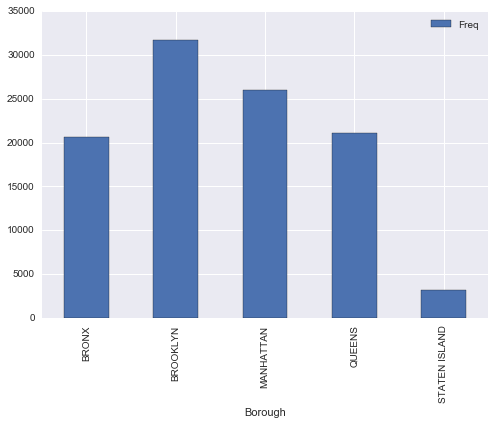

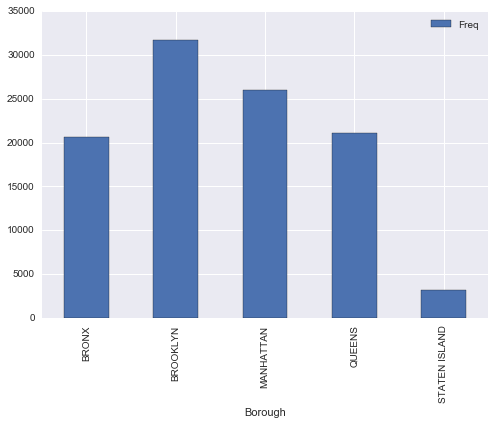

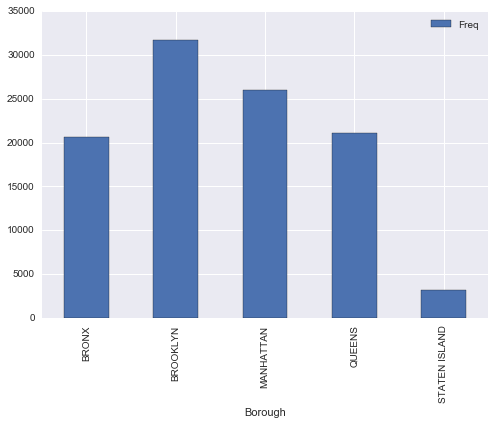

In [94]:
borough.plot.bar()
plt.show()

vis of bro

In [97]:
open('nybro.geojson').read()[1:2000]

'\n  "type": "FeatureCollection",\n  "features": [\n    {"type":"Feature","properties":{"shape_area":"1623819823.81","boro_name":"Staten Island","boro_code":"5","shape_leng":"330470.010332"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-74.05050806403247,40.566422034160816],[-74.05047137128544,40.566417387938124],[-74.05030321271761,40.56641746170314],[-74.05012587375454,40.5664058803351],[-74.04998352562573,40.56639592492826],[-74.04931640362085,40.56588774778043],[-74.04923629842045,40.5653627363681],[-74.05002620158642,40.56531818062114],[-74.05074409977213,40.56588712593503],[-74.05074768943298,40.565954076753876],[-74.05073223954277,40.5659921195203],[-74.05073571037052,40.56603277459579],[-74.05080326895582,40.56605220046115],[-74.05087333045633,40.56608124020986],[-74.05090601705088,40.56609434213061],[-74.05091292519015,40.56613368475719],[-74.05088200371617,40.56617829000412],[-74.05085250143459,40.566189555703275],[-74.05083386287333,40.56619667357833],[-74.05076507357

In [106]:
open('ny3.geojson').read()[1:2000]

'\n"type": "FeatureCollection",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },\n                                                                                \n"features": [\n{ "type": "Feature", "properties": { "shape_area": "47182160.4145", "precinct": "1", "shape_leng": "79979.409545", "crimedata_Number": 1383 }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ -74.043877615739504, 40.690187676376652 ], [ -74.043505960125401, 40.689687359636352 ], [ -74.042735338269821, 40.69005019142044 ], [ -74.042784333800057, 40.690120976691148 ], [ -74.042704284267657, 40.690155204644306 ], [ -74.042553720373078, 40.6899627592896 ], [ -74.0426392937119, 40.689928176413332 ], [ -74.0426938081918, 40.689997259107216 ], [ -74.043467523102649, 40.689636990103473 ], [ -74.043516372458555, 40.68919103374234 ], [ -74.043640786274125, 40.688766559570141 ], [ -74.043974585561841, 40.688582407055911 ], [ -74.044385217772799, 40.688516178402686 ], [ -7

In [100]:
bro_g=pd.DataFrame(data1.groupby('Borough').size())

In [108]:
bro_g.to_csv('brogroup.csv')
bro_g=pd.read_csv('brogroup.csv')

In [107]:
bro_g.columns=['boro_name','freq']

In [109]:
bro_g

Unnamed: 0      boro_name   freq
0           0          BRONX  20683
1           1       BROOKLYN  31699
2           2      MANHATTAN  26035
3           3         QUEENS  21057
4           4  STATEN ISLAND   3172

In [ ]:
with open(".geojson") as file: #first read the file and store it in an object
    data_0 = json.load(file)
data_1 = pd.read_json(json.dumps(data_0["features"]), typ='frame')
data_1 = data_1.ix[:,1]
data_2 = pd.concat([pd.DataFrame.from_dict(item, orient='index').T for item in data_1])
map_1 = folium.Map(location=NY_COORDINATES, zoom_start=12)
map_1.choropleth(geo_path='ny3.geojson', data=data_2, columns=['precinct', 'crimedata_Number'],
                key_on='feature.properties.precinct',fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2) 
